In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

ссылка на датасет:https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009 

In [16]:
df = pd.read_csv('winequality-red.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [17]:
df.head(n = 10).style.background_gradient(cmap = "Purples_r")

Первичный анализ данных

Предобработку данных

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [19]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [20]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

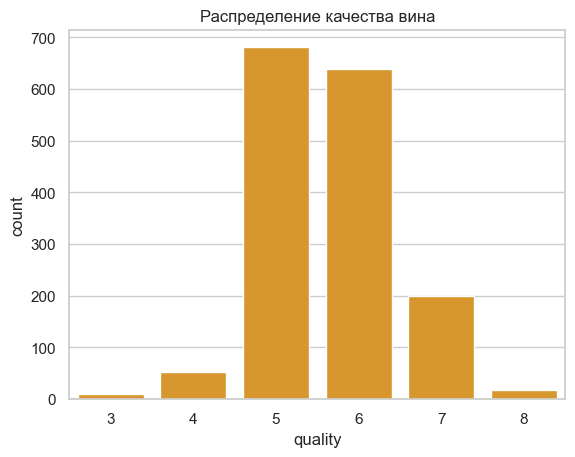

In [21]:
sns.countplot(x='quality', data=df, color = '#F39C12')
plt.title('Распределение качества вина')
plt.show()

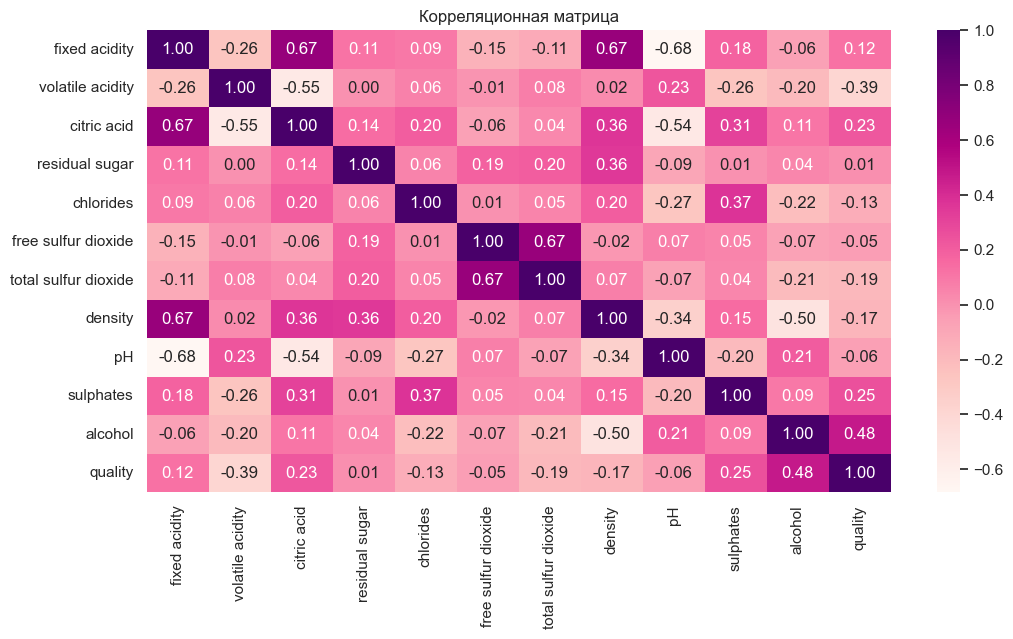

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdPu')
plt.title('Корреляционная матрица')
plt.show()

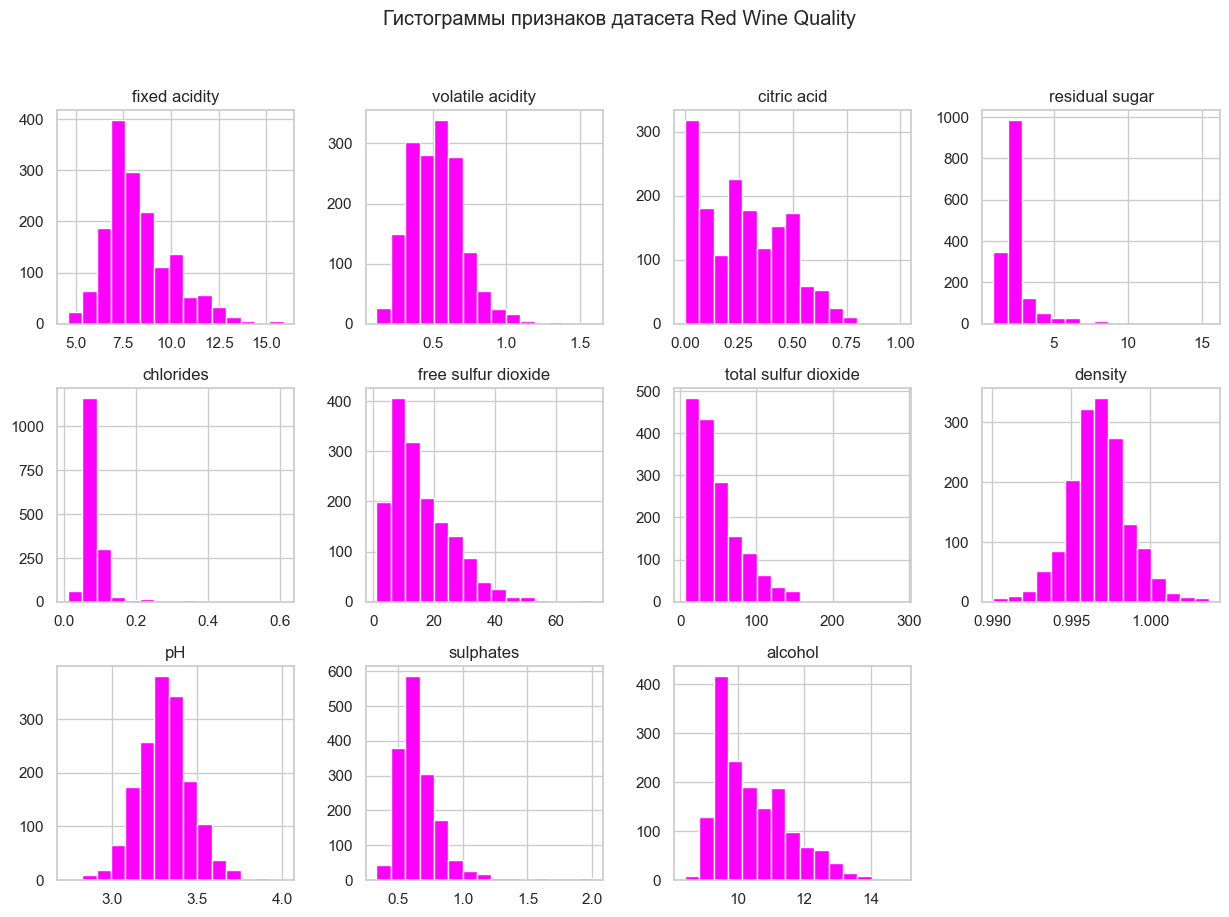

In [23]:
features = df.columns[:-1]  
df[features].hist(bins=15, figsize=(15, 10), layout=(3, 4), color = 'magenta')

plt.suptitle('Гистограммы признаков датасета Red Wine Quality')
plt.show()

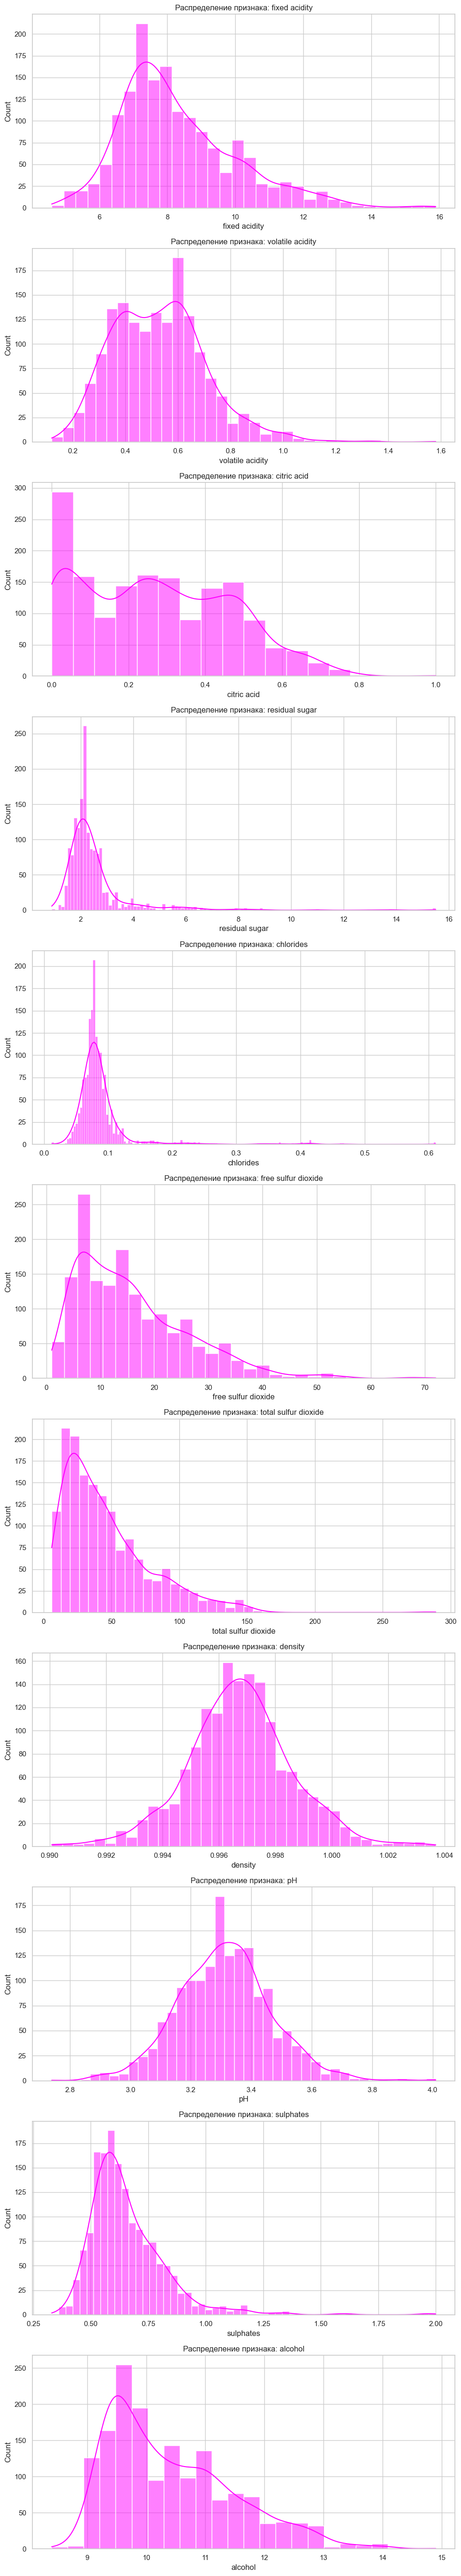

In [24]:
sns.set(style='whitegrid')


n_features = len(features)
fig, axs = plt.subplots(nrows=n_features, figsize=(10, 5 * n_features))

for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axs[i], color = 'magenta')
    axs[i].set_title(f'Распределение признака: {feature}')

plt.tight_layout()
plt.show()

Значения переменной «fixed_acidity» распределены относительно нормально (но немного смещены влево). Но в распределениях других переменных «летучая_кислота» и «лимонная_кислота» есть два пика.

Распределения переменных "alcohol", "residual sugar" и "chlorides" являются нормальными

Большинство значений переменной «fixed_acidity» находятся в диапазоне 7 – 8;

Большинство значений переменной «летучая_кислотность» находится в диапазоне 0,4 – 0,7;

Большинство значений переменной «citric_acid» находится в диапазоне 0,0 – 0,1;

Большинство значений переменной «residual_sugar» находятся в диапазоне 1 – 2,5;

Большинство значений переменной «хлориды» находятся в диапазоне 0,085 – 0,15;

Большинство значений переменной «free_sulfur_dioxyd» находятся в диапазоне 0 – 15;

Большинство значений переменной «total_sulfur_diоксид» находится в диапазоне 0 – 30;

Большинство значений переменной «плотность» находится в диапазоне 0,996 – 0,998;

Большинство значений переменной «рН» находится в пределах 3,2 – 3,4;

Большинство значений переменной «сульфаты» находятся в диапазоне 0,50 – 0,75;

Большинство значений переменной «алкоголь» находится в диапазоне 9 – 10;

Большинство значений переменной «качество» — 5 и 6

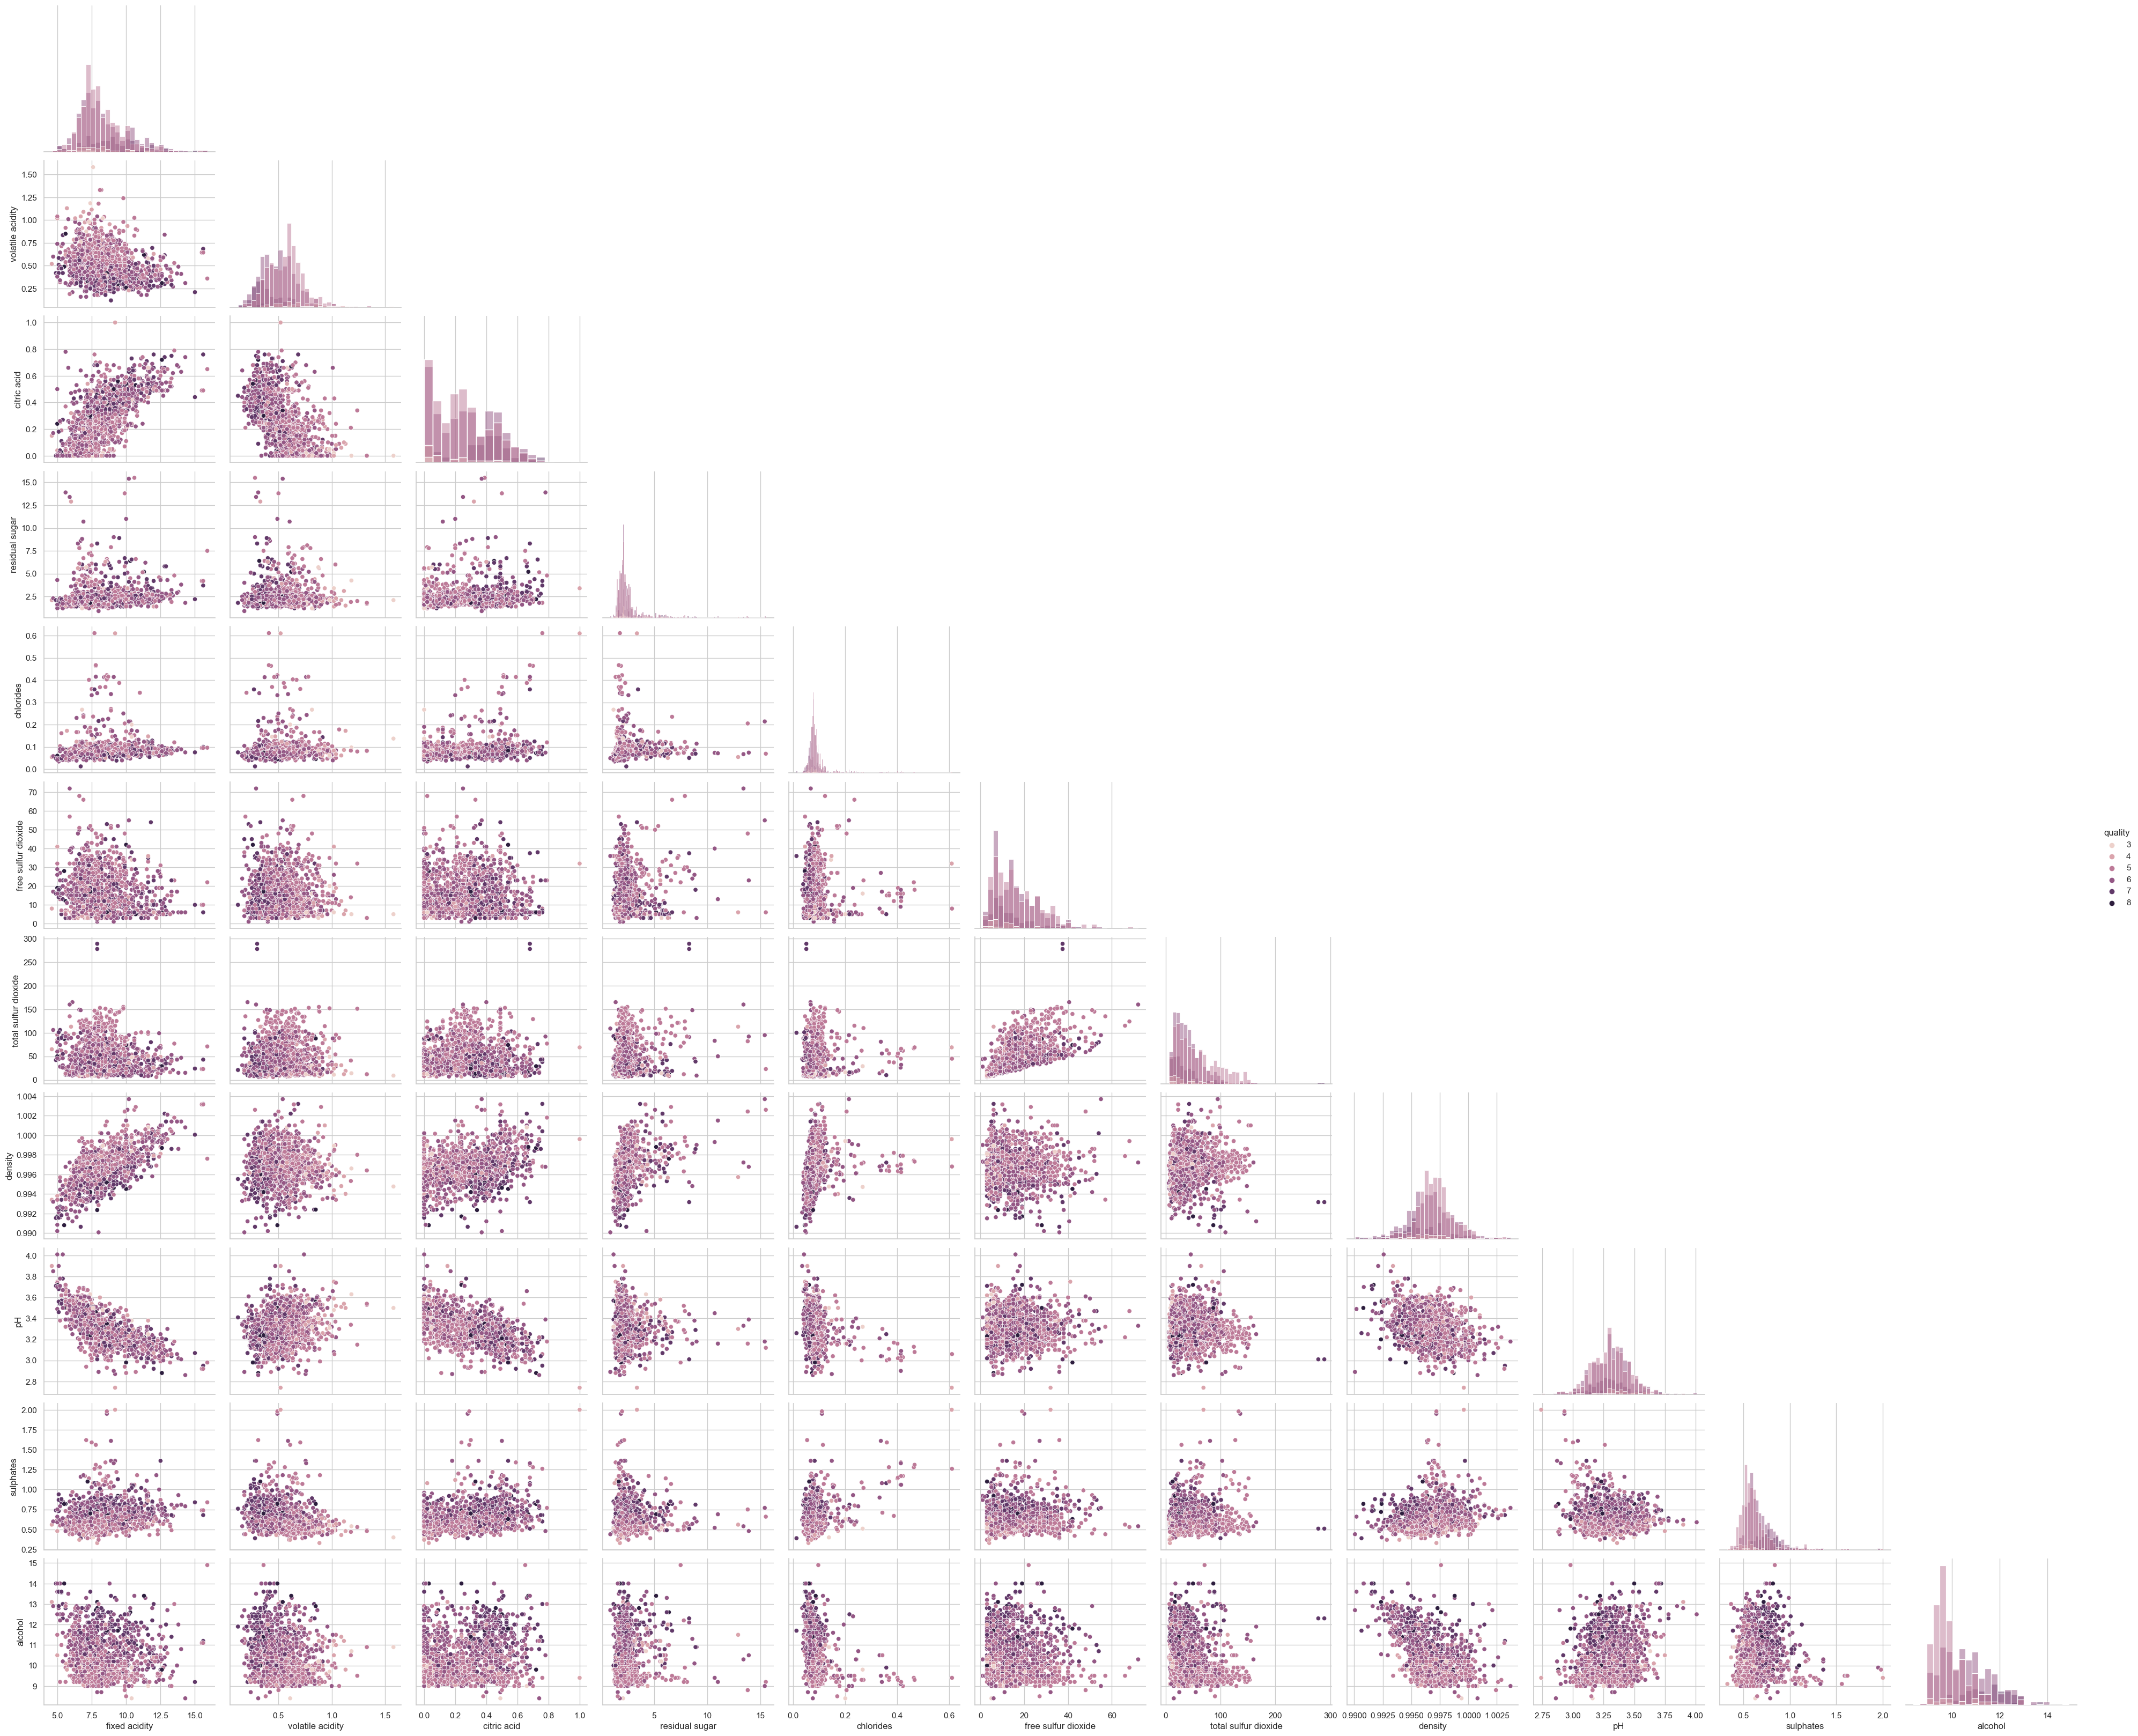

In [25]:
sns.pairplot(df, diag_kind = "hist", hue = "quality", height = 3, aspect = 1.2, corner = True)

Разведывательный анализ данных (Exploratory Data Analysis)

In [26]:
df["quality"] = np.where(df["quality"] > 5, 1, 0)
df['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

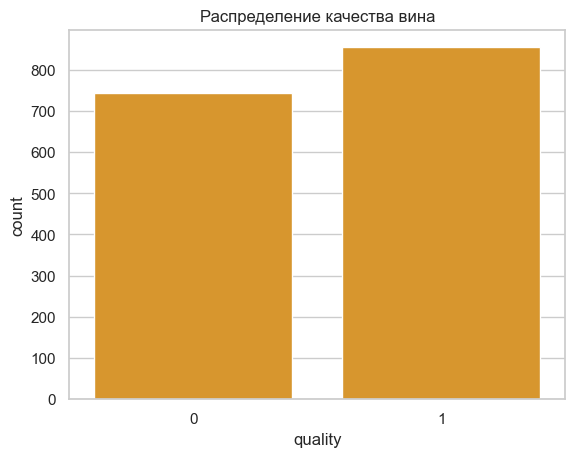

In [27]:
sns.countplot(x='quality', data=df, color = '#F39C12')
plt.title('Распределение качества вина')
plt.show()

В данном случае я разделяю целевую переменную на две части:

Высококачественное вино: 6–8

Вино низкого качества: 3 - 5

In [13]:
y = df["quality"]

x = df.drop("quality", axis = 1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle = True, random_state = 1)

Стандартизация данных

In [194]:
norm = MinMaxScaler(feature_range = (0, 1))
norm.fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

In [195]:
x_train

array([[0.23893805, 0.1369863 , 0.23      , ..., 0.54330709, 0.17365269,
        0.26153846],
       [0.32743363, 0.38013699, 0.26      , ..., 0.4488189 , 0.11976048,
        0.12307692],
       [0.69911504, 0.17808219, 0.6       , ..., 0.28346457, 0.23952096,
        0.32307692],
       ...,
       [0.17699115, 0.41438356, 0.09      , ..., 0.48031496, 0.09580838,
        0.36923077],
       [0.2300885 , 0.34931507, 0.        , ..., 0.49606299, 0.1497006 ,
        0.09230769],
       [0.39823009, 0.19178082, 0.5       , ..., 0.37007874, 0.21556886,
        0.63076923]])

Выберите несколько метрик для оценки моделей машинного обучения. Обоснуйте свой выбор и дайте интерпретацию метрик для бизнес-задачи.

В данном случае я буду использовать метрики стандартный набор метрик для оценки качества модели: precision, recall, f1_score, accuracy  

1) Модель K-ближайших соседей (KNN)

In [196]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

Настройка гиперпараметров для модели KNN:

In [197]:
knn_params = {"n_neighbors": np.arange(2, 50),
             "weights": ["uniform", "distance"],
             "leaf_size": [25, 30, 25]}

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [25, 30, 25],
                         'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [202]:
print("Best score for train set: " + str(knn_cv_model.best_score_))

print("____________________________________________")

print("best K value: " + str(knn_cv_model.best_params_["n_neighbors"]),
     "\nbest weights: " + knn_cv_model.best_params_["weights"],
     "\nbest leaf size: " + str(knn_cv_model.best_params_["leaf_size"]))

Best score for train set: 0.798172268907563
____________________________________________
best K value: 21 
best weights: distance 
best leaf size: 25


In [203]:
knn_model = KNeighborsClassifier(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                leaf_size = knn_cv_model.best_params_["leaf_size"],
                                weights = knn_cv_model.best_params_["weights"])

knn_model.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=21, weights='distance')

In [204]:
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.715

In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       188
           1       0.74      0.71      0.72       212

    accuracy                           0.71       400
   macro avg       0.71      0.72      0.71       400
weighted avg       0.72      0.71      0.72       400



2. Наивный байесовский классификатор

In [211]:
nb_classifier = MultinomialNB(alpha=1.0)
nb_classifier.fit(x_train, y_train)

MultinomialNB()

In [213]:
y_pred_nb = nb_classifier.predict(x_test)

In [214]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.28      0.42       188
           1       0.60      0.97      0.74       212

    accuracy                           0.64       400
   macro avg       0.74      0.62      0.58       400
weighted avg       0.73      0.64      0.59       400



3. Метод опорных векторов

In [218]:
svm_classifier = SVC(kernel='linear', C=1.0)

In [220]:
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [222]:
y_pred_svc = svm_classifier.predict(x_test)

In [223]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74       188
           1       0.79      0.70      0.74       212

    accuracy                           0.74       400
   macro avg       0.75      0.75      0.74       400
weighted avg       0.75      0.74      0.74       400



Построю такую же модель с установкой гиперпараметра

In [225]:
parameters = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']  
}


svm = SVC()

grid_search = GridSearchCV(svm, parameters, cv=5)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

In [227]:
y_pred_svc_best = best_svm.predict(x_test)

In [228]:
print(classification_report(y_test, y_pred_svc_best))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       188
           1       0.76      0.71      0.73       212

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.72       400
weighted avg       0.73      0.72      0.73       400



4. Логистическая регрессия

In [229]:
log_reg = LogisticRegression()

log_reg.fit(x_train, y_train)

LogisticRegression()

In [231]:
y_pred_log = log_reg.predict(x_test)

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73       188
           1       0.77      0.72      0.74       212

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



Постройте ансамблевую модель машинного обучения.

Реализовал gbm модель

In [234]:
gbm = GradientBoostingClassifier()

Гиперпараметры для gbm модели

In [235]:
gbm_params = {"learning_rate": [0.005, 0.008, 0.1, 0.15],
              "n_estimators": [80, 100, 150, 200],
              "max_depth": [2, 3, 4],
              "min_samples_split": [2, 3, 4]}

gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1)
gbm_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.005, 0.008, 0.1, 0.15],
                         'max_depth': [2, 3, 4], 'min_samples_split': [2, 3, 4],
                         'n_estimators': [80, 100, 150, 200]})

In [236]:
print("Best score for train set: " + str(gbm_cv_model.best_score_))

print("__________________________________________________________")

print("best learning_rate value: " + str(gbm_cv_model.best_params_["learning_rate"]),
     "\nbest n_estimators value: " + str(gbm_cv_model.best_params_["n_estimators"]),
     "\nbest max_depth value: " + str(gbm_cv_model.best_params_["max_depth"]),
     "\nbest min_samples_split value: " + str(gbm_cv_model.best_params_["min_samples_split"]))

Best score for train set: 0.8106652661064426
__________________________________________________________
best learning_rate value: 0.15 
best n_estimators value: 100 
best max_depth value: 4 
best min_samples_split value: 3


In [237]:
gbm = GradientBoostingClassifier(learning_rate = gbm_cv_model.best_params_["learning_rate"],
                                 max_depth = gbm_cv_model.best_params_["max_depth"],
                                 n_estimators = gbm_cv_model.best_params_["n_estimators"],
                                 min_samples_split = gbm_cv_model.best_params_["min_samples_split"])
gbm_model = gbm.fit(x_train, y_train)

In [238]:
y_pred_gbm = gbm_model.predict(x_test)

In [239]:
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       188
           1       0.82      0.77      0.80       212

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400



В итоге видим, что ансамблевая модель градиентного бустинга выдаёт наилучшие результаты по отношении к другим моделям

### Вывод

В процессе данной работы был взят датасет, который рассматривает признаки влияющие на качество красного вина. 

В работе было построено 5 моделей, в которых выявилась наилучшая ансамблевая модель, при анализе f1 меры(среднее гармоническое значение точности и полноты) 

In [247]:
f1 = {
    'Модель': ['KNeighbors', 'Naiveb', 'SVM', 'Log', 'GBM'],
    'F1-мера': [f1_score(y_test, y_pred), f1_score(y_test, y_pred_nb), f1_score(y_test, y_pred_svc_best), f1_score(y_test, y_pred_log), f1_score(y_test, y_pred_gbm)]
}
result = pd.DataFrame(f1)
result

Модель   F1-мера
0  KNeighbors  0.741410
1      Naiveb  0.741410
2         SVM  0.731707
3         Log  0.744526
4         GBM  0.798054